In [2]:
import pandas as pd
from IPython.display import display, HTML
credit = pd.io.parsers.read_csv("default _creditcardclients.csv")
#credit.head()
credit = credit.rename(columns={'default payment next month': 'defaultPayment_Nextmonth'})
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')

credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['defaultPayment_Nextmonth'] = credit['defaultPayment_Nextmonth'].astype('category')

#credit.info()
credit.isnull().values.any()
nan_rows = credit[credit['SEX'].isnull()]
nan_rows = credit[credit.isnull().T.any().T]
#print(nan_rows)
#credit.describe()
originalCredit = credit.copy()
initialColumns = credit.iloc[:,0:12] 
midColumns = credit.iloc[:,12:24]
lastColumn = credit.iloc[:,24:25] 
from sklearn.preprocessing import StandardScaler
x = midColumns.values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = list(midColumns.columns.values)
credit = pd.concat([initialColumns, x_pca, lastColumn],sort=True, axis=1)

del credit['ID']
display(credit)
credit.to_csv('NewdefaultValues.csv')
originalCredit.to_csv('originaldefaultValues.csv')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPayment_Nextmonth
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.006957,0.041358,-0.000887,0.056266,-0.014605,0.011856,0.008438,0.007986,0.013964,1
1,120000,2,2,2,26,-1,2,0,0,0,...,-0.002852,-0.043890,0.026190,0.099979,-0.084582,-0.006024,0.012391,-0.003943,0.002090,1
2,90000,2,2,2,34,0,0,0,0,0,...,-0.129073,-0.098247,0.022383,0.068988,-0.028833,0.110182,-0.074111,-0.041491,-0.055414,0
3,50000,2,2,1,37,0,0,0,0,0,...,-0.035340,0.055308,-0.050466,0.028205,0.123821,-0.003396,0.150331,0.018002,-0.055896,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0.218238,0.465420,-0.305334,1.023194,-0.040981,-0.025187,0.072373,-0.037712,-0.012015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,-0.654073,0.516269,-0.446411,0.160718,2.258837,-0.745586,0.546763,-0.044202,-0.215454,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,0.110448,0.074320,0.353838,0.091432,-0.025274,-0.066100,-0.005875,0.027044,-0.006122,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,0.479580,-0.192105,0.947349,0.166085,-0.183737,-0.027731,0.049898,0.012460,-0.009275,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,-0.862162,2.150790,-0.985331,-4.348572,-0.260917,-0.598225,0.189630,-0.140949,-0.005434,1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
credit = pd.io.parsers.read_csv("originaldefaultValues.csv")
del credit['ID']
del credit['Unnamed: 0']
header = credit.dtypes.index
print(header)
plt.hist(credit['LIMIT_BAL'])
plt.show()
corr_matrix  = credit.corr()
print(1)
#np.zeros_like(corr_matrix)

#np.zeros_like(corr_matrix, dtype=np.bool) #Return an array of zeros with the same shape and type as the given array. The dtype parameter overrides the data type of the result.

#mask = np.zeros_like(corr_matrix, dtype=np.bool)

#np.triu_indices_from(mask) #Return the indices for the upper-triangle of array

#mask[np.triu_indices_from(mask)]= True

#f, ax = plt.subplots(figsize=(12, 17)) 
#heatmap = sns.heatmap(corr_matrix, 
                      #mask = mask,
                      #square = True,
                      #linewidths = .5,
                      #cmap ='coolwarm',
                      #cbar_kws={"shrink": .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      #vmin = -1, 
                      #vmax = 1,
                      #annot = True,
                      #annot_kws = {"size": 10})
#ax.set_yticklabels(corr_matrix.columns, rotation = 0)
#ax.set_xticklabels(corr_matrix.columns) #add the column names as labels
#sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#heatmap;
corr = corr_matrix
corr.style.background_gradient(cmap='coolwarm')

plt.plot(credit['LIMIT_BAL'])
plt.show()

x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()


header = credit.dtypes.index
print(header)
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

#corrMat = credit.corr()
#print(corrMat)

#covMat = credit.cov()
#print(covMat)

#Education Count
credit.groupby('EDUCATION')['EDUCATION'].count()
fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Education')

#Education Count
credit.groupby('SEX')['SEX'].count()
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('SEX')


sns.catplot(x="SEX", y="LIMIT_BAL", data=credit);



Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaultPayment_Nextmonth'],
      dtype='object')


<Figure size 640x480 with 1 Axes>

1


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaultPayment_Nextmonth'],
      dtype='object')


<Figure size 640x480 with 1 Axes>

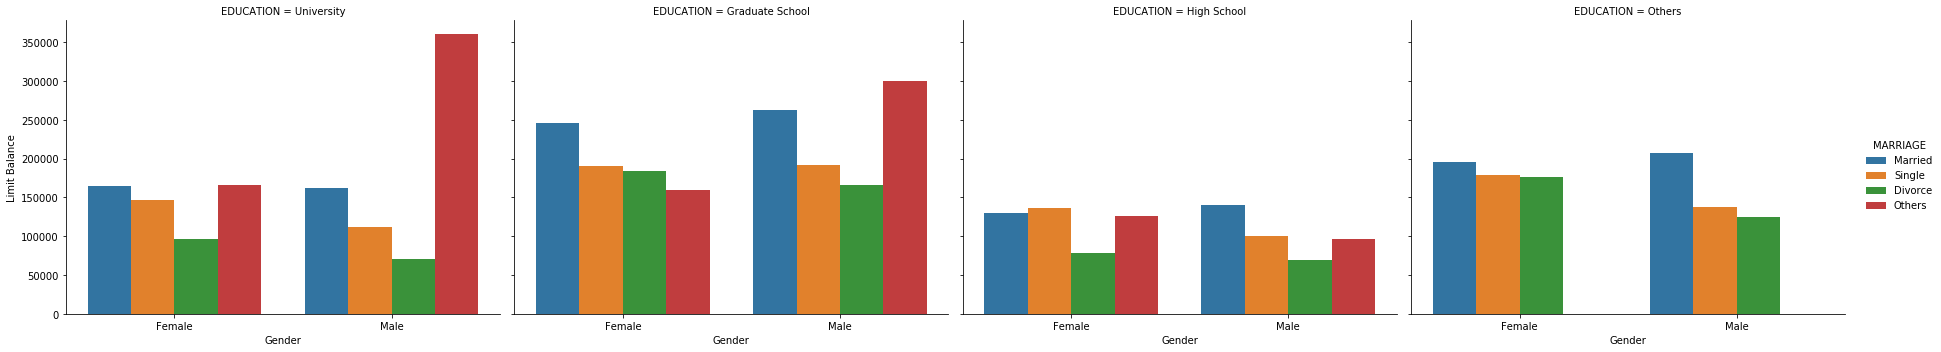

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
credit = pd.io.parsers.read_csv("originaldefaultValues.csv")
del credit['ID']
del credit['Unnamed: 0']
credit.loc[credit['SEX'] == 1,'SEX'] = 'Male'
credit.loc[credit['SEX'] == 2,'SEX'] = 'Female'

credit.loc[credit['MARRIAGE'] == 0,'MARRIAGE'] = 'Others'
credit.loc[credit['MARRIAGE'] == 1,'MARRIAGE'] = 'Married'
credit.loc[credit['MARRIAGE'] == 2,'MARRIAGE'] = 'Single'
credit.loc[credit['MARRIAGE'] == 3,'MARRIAGE'] = 'Divorce'

credit.loc[credit['EDUCATION'] == 0,'EDUCATION'] = 'Others'
credit.loc[credit['EDUCATION'] == 1,'EDUCATION'] = 'Graduate School'
credit.loc[credit['EDUCATION'] == 2,'EDUCATION'] = 'University'
credit.loc[credit['EDUCATION'] == 3,'EDUCATION'] = 'High School'
credit.loc[credit['EDUCATION'] == 4,'EDUCATION'] = 'Others'
credit.loc[credit['EDUCATION'] == 5,'EDUCATION'] = 'Others'
credit.loc[credit['EDUCATION'] == 6,'EDUCATION'] = 'Others'

credit.head()
fg = sns.catplot(x="SEX", y="LIMIT_BAL",hue="MARRIAGE", col="EDUCATION" , kind="bar", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('Gender')
fg.set_ylabels('Limit Balance')



Text(0.5, 1.0, "Distribution of Customers' AGE")

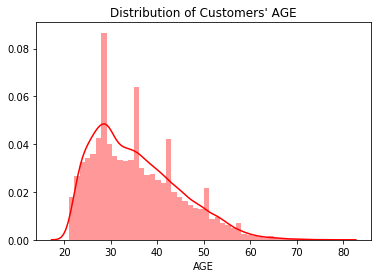

In [5]:
credit.loc[credit['defaultPayment_Nextmonth'] == 0,'defaultPayment_Nextmonth'] = 'NotDefault'
credit.loc[credit['defaultPayment_Nextmonth'] == 1,'defaultPayment_Nextmonth'] = 'Default'

age = credit['AGE'].dropna()
AGE_dist = sns.distplot(age, rug=False, color='red', label="All")
AGE_dist.set_title("Distribution of Customers' AGE")

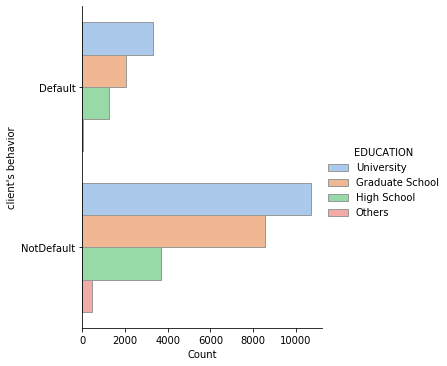

In [6]:
fg = sns.catplot(y="defaultPayment_Nextmonth", hue="EDUCATION", kind="count",
            palette="pastel", edgecolor=".6",
            data=credit);
fg.set_xlabels("Count")
fg.set_ylabels("client's behavior")

In [7]:
def Age_Splitting(passenger):
    AGE, SEX = passenger
    
    if (AGE > 16 and AGE < 30):
        return 'Young Adult'
    if AGE > 30 and AGE < 55:
        return 'Adult'
    else:
        return 'Old'

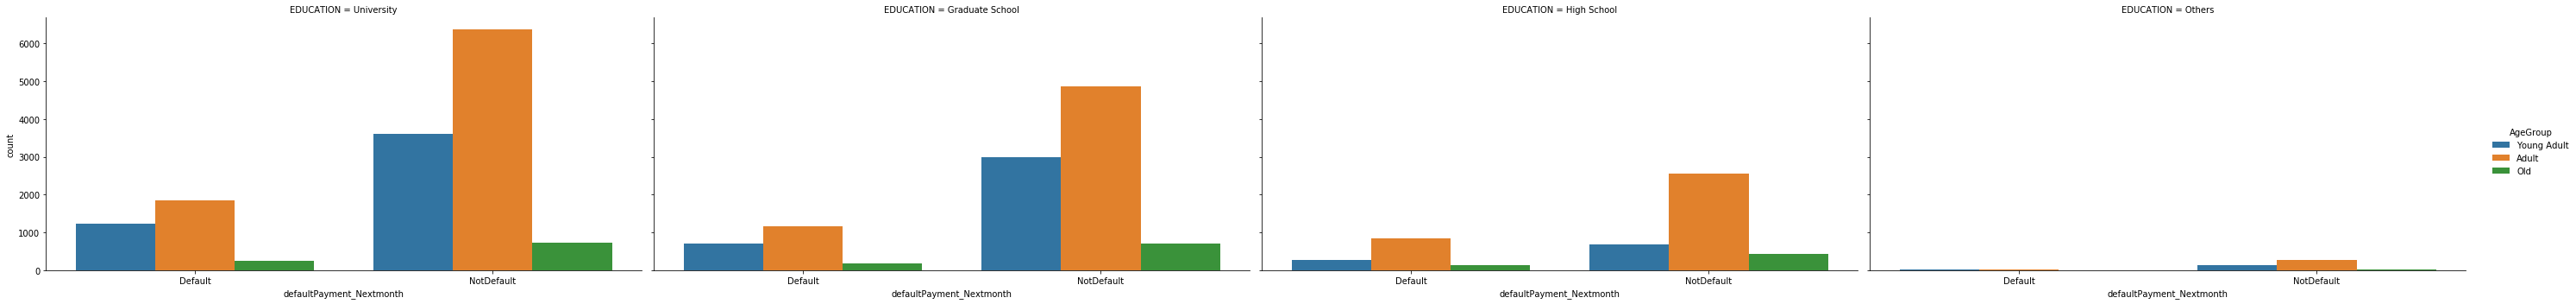

In [8]:
credit['AgeGroup'] = credit[['AGE', 'SEX']].apply(Age_Splitting, axis=1)
sns.catplot('defaultPayment_Nextmonth', col="EDUCATION", data=credit, kind='count', hue='AgeGroup', 
               hue_order=['Young Adult','Adult','Old'], aspect=2)

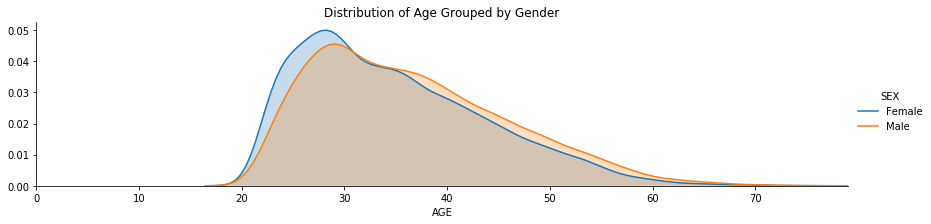

In [9]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
limitAge = credit['AGE'].max()
fig.set(xlim=(0,limitAge))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

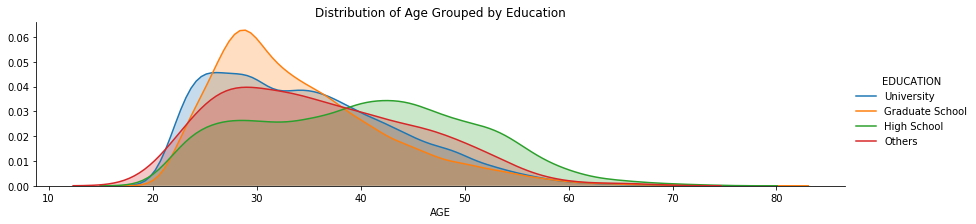

In [10]:
eduPlot = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
eduPlot.map(sns.kdeplot, 'AGE', shade=True)
eduPlot.set(title='Distribution of Age Grouped by Education')
eduPlot.add_legend()

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_0')


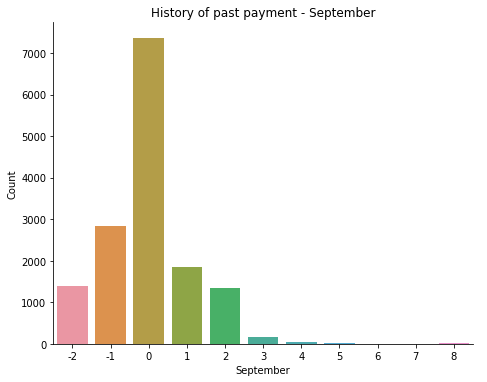

In [11]:
credit['PAY_0'].value_counts()
port = pd.crosstab(index=[credit.SEX], columns=[credit.PAY_0])
print(port.columns)
fg = sns.catplot( kind="bar", data=port, ci=None, aspect=1.3);
fg.set_xlabels('September')
fg.set_ylabels('Count')
fg.set(title='History of past payment - September')
fg.add_legend()

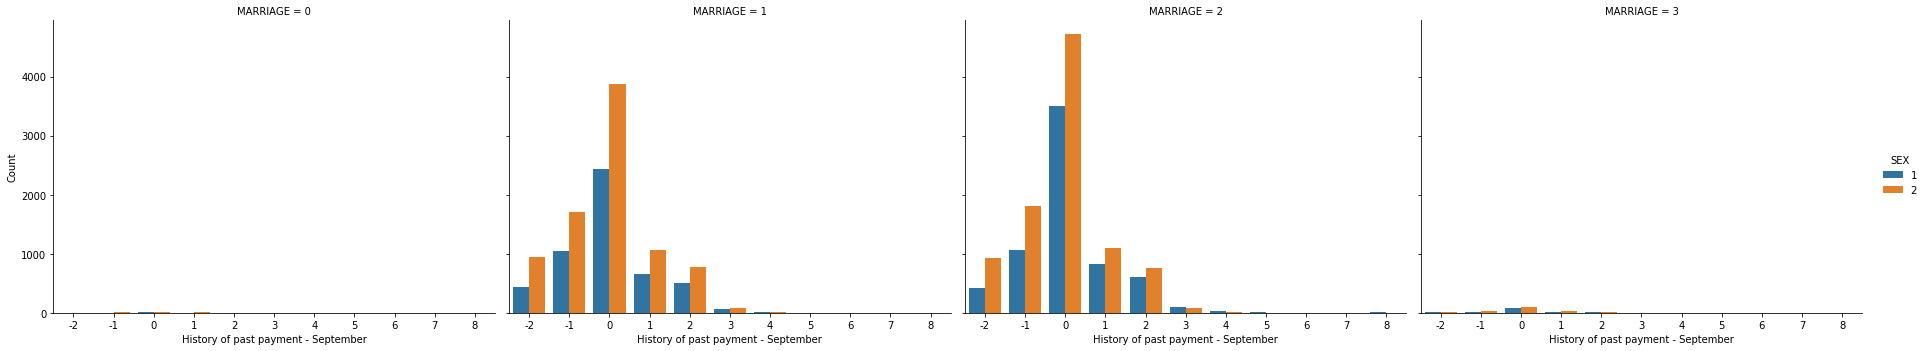

In [48]:
fg = sns.catplot("PAY_0",hue="SEX", col="MARRIAGE" , kind="count", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('History of past payment - September')
fg.set_ylabels('Count')

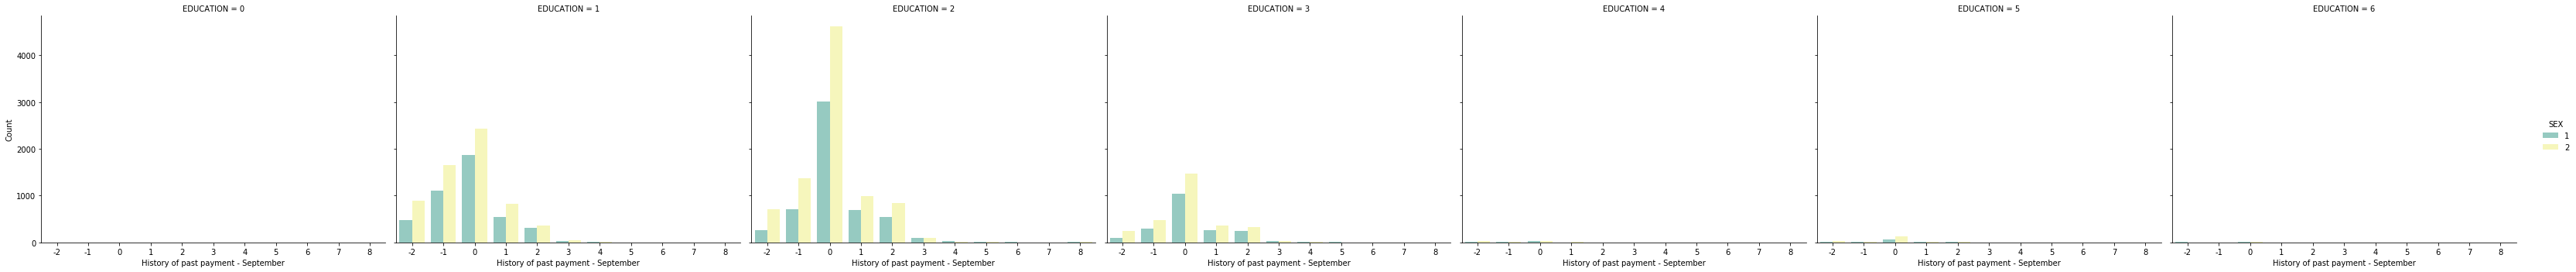

In [49]:
credit.head()
fg = sns.catplot('PAY_0',palette="Set3",hue="SEX", col="EDUCATION" , kind="count", data=credit, ci=None, aspect=1.3);
fg.set_xlabels('History of past payment - September')
fg.set_ylabels('Count')

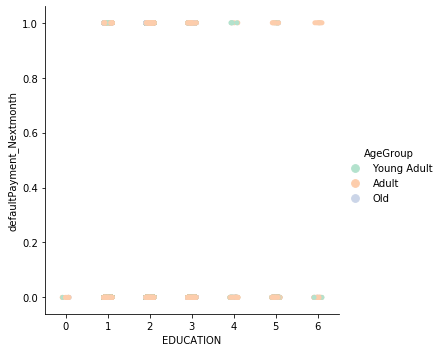

In [47]:
credit = pd.io.parsers.read_csv("originaldefaultValues.csv")
credit['AgeGroup'] = credit[['AGE', 'SEX']].apply(Age_Splitting, axis=1)
sns.catplot(x= 'EDUCATION', y='defaultPayment_Nextmonth', data=credit, hue='AgeGroup', palette='Pastel2', hue_order = ['Young Adult','Adult','Old'] )